Описание:
 Это набор данных из одного банка в Соединенных Штатах. Помимо обычных услуг, этот банк также предоставляет услуги по страхованию автомобилей.Банк регулярно проводит акции по привлечению новых клиентов.
 У банка есть данные потенциальных клиентов, и сотрудники банка звонят им для рекламы доступных вариантов автострахования.
 Нам предоставляется общая информация о клиентах (возраст, работа и т.д.), а также более конкретная информация о текущей кампании продажи страховки (коммуникация, последний день контакта) и предыдущих кампаниях (такие атрибуты, как предыдущие попытки, результат).
 У вас есть данные о 4000 клиентах, с которыми связывались во время последней кампании и для которых известны результаты кампании (покупал ли клиент страховку или нет).
 Задача классификации: 
 Задача состоит в том, чтобы предсказать для 1000 клиентов, с которыми связались во время текущей кампании, будут ли они покупать автомобильную страховку или нет.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [10]:
df = pd.read_csv('carInsurance_train.csv',
                       sep=',', encoding='utf-8',
                       index_col='Id')

In [11]:
df[:5]

,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
Id,,,,,,,,,,,,,,,,,,
1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN,13:45:20,13:46:30,0
2,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,NaN,14:49:03,14:52:08,0
3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,16:30:24,16:36:04,1
4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NaN,12:06:43,12:20:22,1
5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NaN,14:35:44,14:38:56,0


Feature Description Example Id Уникальный идентификационный номер. Файл прогнозов должен содержать эту функцию. “1” … “5000” Age Возраст клиента
job Работа клиента Marital Семейное положение клиента "разведен", "женат", "холост Education Уровень образования клиента "первичный", "вторичный" и т. д. Default Есть ли просроченный кредит ? да -1, нет -0 balance Среднегодовой баланс, в долларах США
HHInsurance Есть ли страховка? да -1, нет -0 CarLoan Имеет ли клиент автокредит да -1, нет -0 Communication Тип контактной связи "сотовая связь", "телефон", “NA” LastContactMonth Месяц последнего контакта
LastContactDay День последнего контакта
CallStart Время начала последнего вызова (ЧЧ:ММ:СС)
CallEnd Время окончания последнего вызова (ЧЧ:ММ:СС)
NoOfContacts Количество контактов, выполненных в ходе данной кампании для данного клиента
DaysPassed Количество дней, прошедших после того, как с клиентом в последний раз связывались из предыдущей кампании (числовое значение; -1 означает, что с клиентом ранее не связывались) PrevAttempts Количество контактов, выполненных до этой кампании и для данного клиента
Outcome Результаты предыдущих маркетинговых кампаний "неудача", "другое", "успех", “NA” Carinsurance Застрахует ли клиент автомобиль? да -1, нет -0

In [12]:
df.shape

(4000, 18)

# Анализ и преобразование данных

In [13]:
df.dtypes

Age                  int64
Job                 object
Marital             object
Education           object
Default              int64
Balance              int64
HHInsurance          int64
CarLoan              int64
Communication       object
LastContactDay       int64
LastContactMonth    object
NoOfContacts         int64
DaysPassed           int64
PrevAttempts         int64
Outcome             object
CallStart           object
CallEnd             object
CarInsurance         int64
dtype: object

In [15]:
df.isnull().sum().sort_values()

Age                    0
CallStart              0
PrevAttempts           0
DaysPassed             0
NoOfContacts           0
LastContactMonth       0
LastContactDay         0
CallEnd                0
CarInsurance           0
HHInsurance            0
Balance                0
Default                0
Marital                0
CarLoan                0
Job                   19
Education            169
Communication        902
Outcome             3042
dtype: int64

In [16]:
df.describe(include='object')

,Job,Marital,Education,Communication,LastContactMonth,Outcome,CallStart,CallEnd
count,3981,4000,3831,3098,4000,958,4000,4000
unique,11,3,3,2,12,3,3777,3764
top,management,married,secondary,cellular,may,failure,17:11:04,10:22:30
freq,893,2304,1988,2831,1049,437,3,3


 Преобразуем'CallStart','CallEnd' из 'object' в 'datetime64[ns]'

In [17]:
df[['CallStart','CallEnd']] = df[['CallStart','CallEnd']].astype('datetime64[ns]')

Удаляем 'Outcome' - слишком сного пустых значений

In [18]:
df=df.drop('Outcome',axis=1)

В 'Job','Education','Communication' в неопределенных данных ставим - 0.

In [19]:
for i in df[['Job','Education', 'Communication']]:
    df[i] = df[i].fillna(df[i].mode()[0])

In [20]:
df.isnull().sum()

Age                 0
Job                 0
Marital             0
Education           0
Default             0
Balance             0
HHInsurance         0
CarLoan             0
Communication       0
LastContactDay      0
LastContactMonth    0
NoOfContacts        0
DaysPassed          0
PrevAttempts        0
CallStart           0
CallEnd             0
CarInsurance        0
dtype: int64

# Дополнительные признаки

Создаем группы по коммуникации(cellular-1, telephone-2, Nan-0)

In [21]:
df['Communication'].value_counts()

cellular     3733
telephone     267
Name: Communication, dtype: int64

In [22]:
codCommunication ={}
for i in df['Communication']:
    if i == 'cellular':
        codCommunication.setdefault(i, 1)
    elif i == 'telephone':
        codCommunication.setdefault(i, 2)
    else:
        codCommunication.setdefault(i, 0)

In [23]:
df['codCommunication'] = df['Communication'].map(codCommunication)

Создаем группы по образованию(primary-1, secondary-2, tertiary -3)

In [24]:
codEducation ={}
for i in df['Education']:
    if i == 'primary':
        codEducation.setdefault(i, 1)
    elif i == 'secondary':
        codEducation.setdefault(i, 2)
    elif i == 'tertiary':
        codEducation.setdefault(i, 3)
    else:
        codEducation.setdefault(i, 0)

In [25]:
df['codEducation'] = df['Education'].map(codEducation)

Создаем группы по семейному положению(primary-1, secondary-2, tertiary -3)

In [26]:
codMarital ={}
for i in df['Marital']:
    if i == 'single':
        codMarital.setdefault(i, 1)
    elif i == 'married':
        codMarital.setdefault(i, 2)
    elif i == 'divorced':
        codMarital.setdefault(i, 3)
    else:
        codMarital.setdefault(i, 0)
        

In [27]:
df['codMarital'] = df['Marital'].map(codMarital)

Создаем группы по возрасту

In [28]:
ageGroup ={}
for i in df['Age']:
    if i <= 18 or i <= 20:
        ageGroup.setdefault(i, 1)
    elif i <20  or i <= 30:
        ageGroup.setdefault(i, 2)
    elif i < 30 or i <= 40:
        ageGroup.setdefault(i, 3)
    elif i < 40 or i <= 50:
        ageGroup.setdefault(i, 4)
    elif i < 50 or i <= 60:
        ageGroup.setdefault(i, 5)
    elif i < 60 or i <= 70:
        ageGroup.setdefault(i, 6)
    elif i < 70 or i <= 80:
        ageGroup.setdefault(i, 7)
    elif i < 80 or i <= 90:
        ageGroup.setdefault(i, 8)
    elif i < 90 or i <= 100:
        ageGroup.setdefault(i, 9)
    elif i >100:
        ageGroup.setdefault(i, 10)

In [29]:
df['ageGroup'] = df['Age'].map(ageGroup)

Создаем группы по времени от последнего контакта

In [30]:
s = {}
for i in df['LastContactDay']:
    if i in range (0,11):
        s.setdefault(i,1)
    elif i in range (11,21):
        s.setdefault(i, 2)
    elif i in range (21,32):
        s.setdefault(i,3)

In [31]:
df['lastContactGroup'] = df['LastContactDay'].map(s)

Создаем группы по работе клиентов

In [32]:
codJob ={}
for i in df['Job']:
    if i == 'blue-collar':
        codJob.setdefault(i, 1)
    elif i == 'entrepreneur':
        codJob.setdefault(i, 2)
    elif i == 'housemaid':
        codJob.setdefault(i, 3)
    elif i == 'services':
        codJob.setdefault(i, 4)
    elif i == 'technician':
        codJob.setdefault(i, 5)
    elif i == 'self-employed':
        codJob.setdefault(i, 6)
    elif i == 'admin':
        codJob.setdefault(i, 7)
    elif i == 'management':
        codJob.setdefault(i, 8)
    elif i == 'unemployed':
        codJob.setdefault(i, 9)
    elif i == 'retired':
        codJob.setdefault(i, 10)
    elif i == 'student':
        codJob.setdefault(i, 11)     
    else:
        codJob.setdefault(i, 0)
        

In [33]:
df['codJob'] = df['Job'].map(codJob)

Группы по продолжительности общения

In [34]:
df['сallDuration'] = df['CallEnd']-df['CallStart']

In [35]:
medianсallDuration = {}
for i in df['сallDuration']:
    if i < df['сallDuration'].median():
        medianсallDuration.setdefault(i, 1)
    else:
        medianсallDuration.setdefault(i, 2)

In [36]:
df['сallDuration'] = df['сallDuration'].map(medianсallDuration)

Группы по месяцу последнего общения

In [37]:
s3 ={}
for i in df['LastContactMonth']:
    if i == 'jan':
        s3.setdefault(i, 1)
    elif i == 'feb':
        s3.setdefault(i, 2)
    elif i == 'mar':
        s3.setdefault(i, 3)
    elif i == 'apr':
        s3.setdefault(i, 4)
    elif i == 'may':
        s3.setdefault(i, 5)
    elif i == 'jun':
        s3.setdefault(i, 6)
    elif i == 'jul':
        s3.setdefault(i, 7)
    elif i == 'aug':
        s3.setdefault(i, 8)
    elif i == 'sep':
        s3.setdefault(i, 9)
    elif i == 'oct':
        s3.setdefault(i, 10)
    elif i == 'nov':
        s3.setdefault(i, 11)     
    elif i == 'dec':
        s3.setdefault(i, 12)

In [38]:
df['LastContactMonth'] = df['LastContactMonth'].map(s3)

График зависимости признаков

<AxesSubplot:>

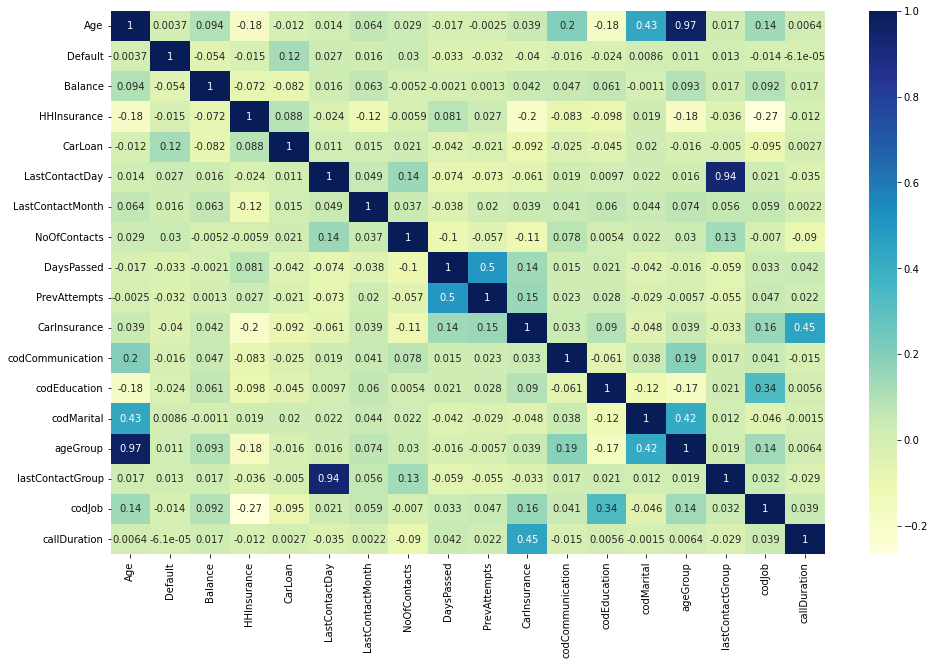

In [39]:
cor=df.corr()
plt.figure(figsize=(16,10))
sns.heatmap(cor,annot=True,cmap= 'YlGnBu')

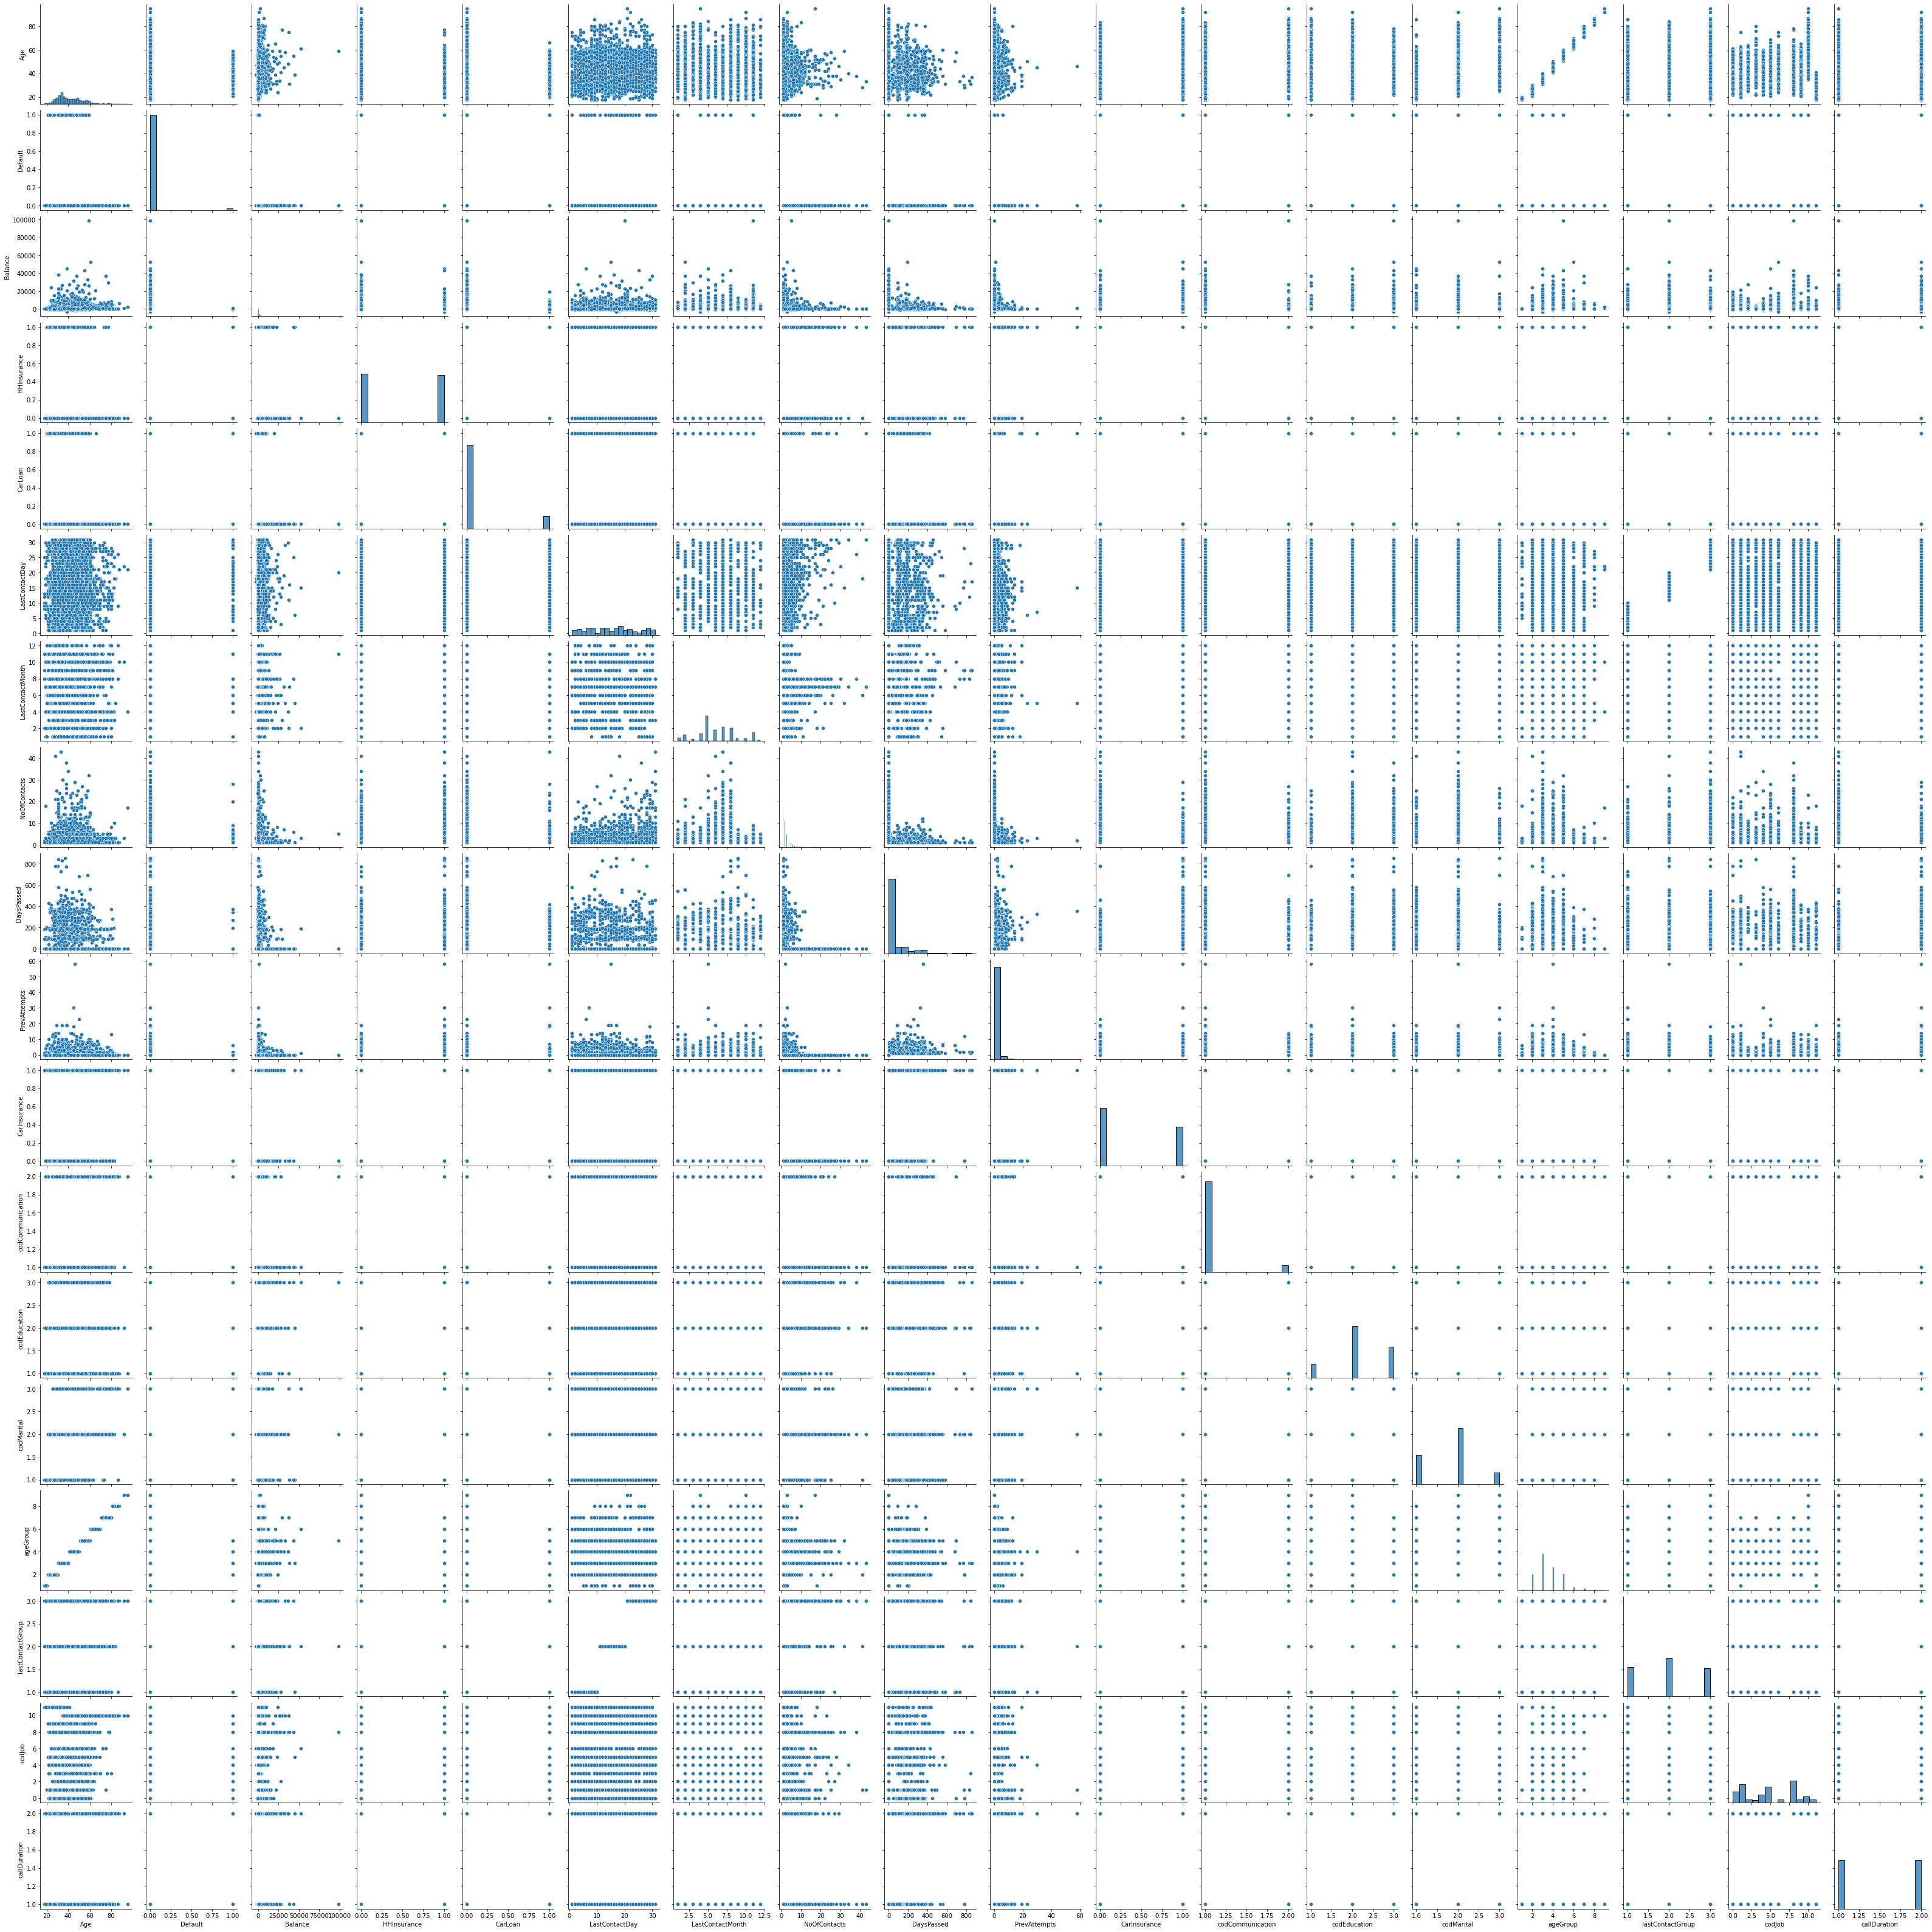

In [40]:
sns.pairplot(df)

In [41]:
df_new=df.drop(columns=['Job', 'Marital', 'Education', 'Communication','CallStart','CallEnd'])

In [42]:
df_new[:5]

,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance,codCommunication,codEducation,codMarital,ageGroup,lastContactGroup,codJob,сallDuration
Id,,,,,,,,,,,,,,,,,,
1,32,0,1218,1,0,28,1,2,-1,0,0,2,3,1,3,3,8,1
2,32,0,1156,1,0,26,5,5,-1,0,0,1,1,2,3,3,1,1
3,29,0,637,1,0,3,6,1,119,1,1,1,3,1,2,1,8,2
4,25,0,373,1,0,11,5,2,-1,0,1,1,1,1,2,2,11,2
5,30,0,2694,0,0,3,6,1,-1,0,0,1,3,2,2,1,8,1


In [43]:
df_new.columns

Index(['Age', 'Default', 'Balance', 'HHInsurance', 'CarLoan', 'LastContactDay',
       'LastContactMonth', 'NoOfContacts', 'DaysPassed', 'PrevAttempts',
       'CarInsurance', 'codCommunication', 'codEducation', 'codMarital',
       'ageGroup', 'lastContactGroup', 'codJob', 'сallDuration'],
      dtype='object')

In [44]:
### Используем GradientBoostingClassifier

In [45]:
X = df_new.drop('CarInsurance',axis=1)
y = df_new['CarInsurance']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state =100)

In [47]:
gb=GradientBoostingClassifier()

In [48]:
model = gb.fit(X_train,y_train)

In [49]:
model.score(X_train,y_train)

0.8023333333333333

# АНАЛИЗ ДАННЫХ текущей компании 

In [50]:
test = pd.read_csv('carInsurance_test.csv',
                       sep=',', encoding='utf-8',
                  index_col='Id')

In [51]:
test.head()

,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
Id,,,,,,,,,,,,,,,,,,
4001,25,admin.,single,secondary,0,1,1,1,NaN,12,may,12,-1,0,NaN,17:17:42,17:18:06,NaN
4002,40,management,married,tertiary,0,0,1,1,cellular,24,jul,1,-1,0,NaN,09:13:44,09:14:37,NaN
4003,44,management,single,tertiary,0,-1313,1,1,cellular,15,may,10,-1,0,NaN,15:24:07,15:25:51,NaN
4004,27,services,single,secondary,0,6279,1,0,cellular,9,nov,1,-1,0,NaN,09:43:44,09:48:01,NaN
4005,53,technician,married,secondary,0,7984,1,0,cellular,2,feb,1,-1,0,NaN,16:31:51,16:34:22,NaN


In [52]:
test[['CallStart','CallEnd']] = test[['CallStart','CallEnd']].astype('datetime64[ns]')
test=test.drop('Outcome',axis=1)

for i in test[['Job','Education', 'Communication']]:
    test[i] = test[i].fillna(test[i].mode()[0])

codCommunication ={}
for i in test['Communication']:
    if i == 'cellular':
        codCommunication.setdefault(i, 1)
    elif i == 'telephone':
        codCommunication.setdefault(i, 2)
    else:
        codCommunication.setdefault(i, 0)
test['codCommunication'] = test['Communication'].map(codCommunication)

codEducation ={}
for i in test['Education']:
    if i == 'primary':
        codEducation.setdefault(i, 1)
    elif i == 'secondary':
        codEducation.setdefault(i, 2)
    elif i == 'tertiary':
        codEducation.setdefault(i, 3)
    else:
        codEducation.setdefault(i, 0)
test['codEducation'] = test['Education'].map(codEducation)

codMarital ={}
for i in test['Marital']:
    if i == 'single':
        codMarital.setdefault(i, 1)
    elif i == 'married':
        codMarital.setdefault(i, 2)
    elif i == 'divorced':
        codMarital.setdefault(i, 3)
    else:
        codMarital.setdefault(i, 0)
test['codMarital'] = test['Marital'].map(codMarital)

ageGroup ={}
for i in test['Age']:
    if i <= 18 or i <= 20:
        ageGroup.setdefault(i, 1)
    elif i <20  or i <= 30:
        ageGroup.setdefault(i, 2)
    elif i < 30 or i <= 40:
        ageGroup.setdefault(i, 3)
    elif i < 40 or i <= 50:
        ageGroup.setdefault(i, 4)
    elif i < 50 or i <= 60:
        ageGroup.setdefault(i, 5)
    elif i < 60 or i <= 70:
        ageGroup.setdefault(i, 6)
    elif i < 70 or i <= 80:
        ageGroup.setdefault(i, 7)
    elif i < 80 or i <= 90:
        ageGroup.setdefault(i, 8)
    elif i < 90 or i <= 100:
        ageGroup.setdefault(i, 9)
    elif i >100:
        ageGroup.setdefault(i, 10)
test['ageGroup'] = test['Age'].map(ageGroup)


s = {}
for i in test['LastContactDay']:
    if i in range (0,11):
        s.setdefault(i,1)
    elif i in range (11,21):
        s.setdefault(i, 2)
    elif i in range (21,32):
        s.setdefault(i,3)        
test['lastContactGroup'] = test['LastContactDay'].map(s)        

test['сallDuration'] = test['CallEnd']-test['CallStart']
medianсallDuration = {}
for i in test['сallDuration']:
    if i < test['сallDuration'].median():
        medianсallDuration.setdefault(i, 1)
    else:
        medianсallDuration.setdefault(i, 2)
test['сallDuration'] = test['сallDuration'].map(medianсallDuration)

s3 ={}
for i in test['LastContactMonth']:
    if i == 'jan':
        s3.setdefault(i, 1)
    elif i == 'feb':
        s3.setdefault(i, 2)
    elif i == 'mar':
        s3.setdefault(i, 3)
    elif i == 'apr':
        s3.setdefault(i, 4)
    elif i == 'may':
        s3.setdefault(i, 5)
    elif i == 'jun':
        s3.setdefault(i, 6)
    elif i == 'jul':
        s3.setdefault(i, 7)
    elif i == 'aug':
        s3.setdefault(i, 8)
    elif i == 'sep':
        s3.setdefault(i, 9)
    elif i == 'oct':
        s3.setdefault(i, 10)
    elif i == 'nov':
        s3.setdefault(i, 11)     
    elif i == 'dec':
        s3.setdefault(i, 12)
test['LastContactMonth'] = test['LastContactMonth'].map(s3)

codJob ={}
for i in test['Job']:
    if i == 'blue-collar':
        codJob.setdefault(i, 1)
    elif i == 'entrepreneur':
        codJob.setdefault(i, 2)
    elif i == 'housemaid':
        codJob.setdefault(i, 3)
    elif i == 'services':
        codJob.setdefault(i, 4)
    elif i == 'technician':
        codJob.setdefault(i, 5)
    elif i == 'self-employed':
        codJob.setdefault(i, 6)
    elif i == 'admin':
        codJob.setdefault(i, 7)
    elif i == 'management':
        codJob.setdefault(i, 8)
    elif i == 'unemployed':
        codJob.setdefault(i, 9)
    elif i == 'retired':
        codJob.setdefault(i, 10)
    elif i == 'student':
        codJob.setdefault(i, 11)     
    else:
        codJob.setdefault(i, 0)
test['codJob'] = test['Job'].map(codJob)


test_new=test.drop(columns=['Job', 'Marital', 'Education', 'Communication','CallStart','CallEnd','CarInsurance'])

In [53]:
test_new.columns

Index(['Age', 'Default', 'Balance', 'HHInsurance', 'CarLoan', 'LastContactDay',
       'LastContactMonth', 'NoOfContacts', 'DaysPassed', 'PrevAttempts',
       'codCommunication', 'codEducation', 'codMarital', 'ageGroup',
       'lastContactGroup', 'сallDuration', 'codJob'],
      dtype='object')

In [54]:
feature = ['Age', 'Default', 'Balance', 'HHInsurance', 'CarLoan', 'LastContactDay',
       'LastContactMonth', 'NoOfContacts', 'DaysPassed', 'PrevAttempts',
       'codCommunication', 'codEducation', 'codMarital', 'ageGroup',
       'lastContactGroup', 'сallDuration', 'codJob']

In [55]:
test_new.head()

,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,codCommunication,codEducation,codMarital,ageGroup,lastContactGroup,сallDuration,codJob
Id,,,,,,,,,,,,,,,,,
4001,25,0,1,1,1,12,5,12,-1,0,1,2,1,2,2,1,0
4002,40,0,0,1,1,24,7,1,-1,0,1,3,2,3,3,1,8
4003,44,0,-1313,1,1,15,5,10,-1,0,1,3,1,4,2,1,8
4004,27,0,6279,1,0,9,11,1,-1,0,1,2,1,2,1,2,4
4005,53,0,7984,1,0,2,2,1,-1,0,1,2,2,5,1,1,5


# Распределение данных после обработки ( данные распределены равномерно, выбросов нет) 

(array([ 45., 209., 295., 163., 140., 101.,  16.,  19.,  11.,   1.]),
 array([18. , 25.4, 32.8, 40.2, 47.6, 55. , 62.4, 69.8, 77.2, 84.6, 92. ]),
 <BarContainer object of 10 artists>)

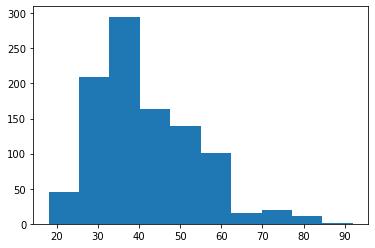

In [56]:
plt.hist(test['Age'], bins = 10)

(array([823., 139.,  29.,   6.,   0.,   1.,   1.,   0.,   0.,   1.]),
 array([-1980.,  2381.,  6742., 11103., 15464., 19825., 24186., 28547.,
        32908., 37269., 41630.]),
 <BarContainer object of 10 artists>)

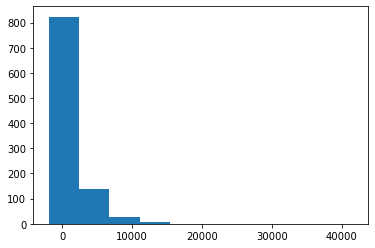

In [57]:
plt.hist(test['Balance'], bins = 10)

(array([ 60., 129., 107.,  99., 116., 115., 135.,  50.,  67., 122.]),
 array([ 1.,  4.,  7., 10., 13., 16., 19., 22., 25., 28., 31.]),
 <BarContainer object of 10 artists>)

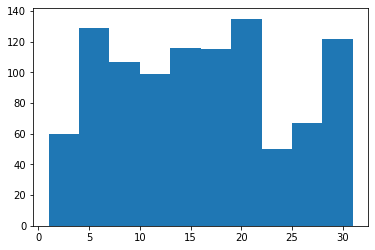

In [58]:
plt.hist(test['LastContactDay'], bins = 10)

(array([ 97.,  31.,  92., 269., 107., 142., 128.,  17.,  35.,  82.]),
 array([ 1. ,  2.1,  3.2,  4.3,  5.4,  6.5,  7.6,  8.7,  9.8, 10.9, 12. ]),
 <BarContainer object of 10 artists>)

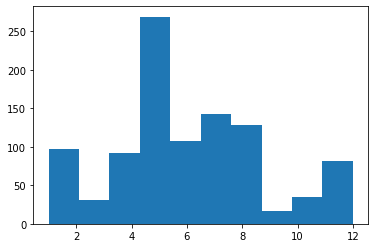

In [59]:
plt.hist(test['LastContactMonth'], bins = 10)

## Применяем выбранную модель на TEST данных и записываем файл с прогнозом - купит (1) или не купит страховку(0) 

In [60]:
test_new['CarInsurance']= model.predict(test_new.loc[:, feature])

In [61]:
car_ins = test_new[test_new['CarInsurance'] == 1]

In [62]:
car_ins.shape

(527, 18)

### Вывод: Анализируя данные 1 000 клиентов банка, по которым были сделаны холодные звонки, приходим к выводу что только 527 клиентов из этого списка купят автомобильную страховку. Данные основаны на построенной нами модели с использованием GradientBoostingClassifier с вероятностью 80,23% 

In [63]:
car_ins[['CarInsurance']].head(5)

,CarInsurance
Id,
4004,1
4006,1
4009,1
4012,1
4014,1


In [64]:
car_ins[['CarInsurance']].to_csv('Goremykina_car_insurance.csv')